In \[12\]:

    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    from umap import UMAP
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score
    import matplotlib.pyplot as plt


    data = pd.read_csv("E:\IISER-TVM Files\Internship\Prof. Saptarshi Bej\Liver Cirhossis Dataset\cirrhosis.csv")
    data.head(10)

Out\[12\]:

|     | ID  | N_Days | Status | Drug            | Age   | Sex | Ascites | Hepatomegaly | Spiders | Edema | Bilirubin | Cholesterol | Albumin | Copper | Alk_Phos | SGOT   | Tryglicerides | Platelets | Prothrombin | Stage |
|-----|-----|--------|--------|-----------------|-------|-----|---------|--------------|---------|-------|-----------|-------------|---------|--------|----------|--------|---------------|-----------|-------------|-------|
| 0   | 1   | 400    | D      | D-penicillamine | 21464 | F   | Y       | Y            | Y       | Y     | 14.5      | 261.0       | 2.60    | 156.0  | 1718.0   | 137.95 | 172.0         | 190.0     | 12.2        | 4.0   |
| 1   | 2   | 4500   | C      | D-penicillamine | 20617 | F   | N       | Y            | Y       | N     | 1.1       | 302.0       | 4.14    | 54.0   | 7394.8   | 113.52 | 88.0          | 221.0     | 10.6        | 3.0   |
| 2   | 3   | 1012   | D      | D-penicillamine | 25594 | M   | N       | N            | N       | S     | 1.4       | 176.0       | 3.48    | 210.0  | 516.0    | 96.10  | 55.0          | 151.0     | 12.0        | 4.0   |
| 3   | 4   | 1925   | D      | D-penicillamine | 19994 | F   | N       | Y            | Y       | S     | 1.8       | 244.0       | 2.54    | 64.0   | 6121.8   | 60.63  | 92.0          | 183.0     | 10.3        | 4.0   |
| 4   | 5   | 1504   | CL     | Placebo         | 13918 | F   | N       | Y            | Y       | N     | 3.4       | 279.0       | 3.53    | 143.0  | 671.0    | 113.15 | 72.0          | 136.0     | 10.9        | 3.0   |
| 5   | 6   | 2503   | D      | Placebo         | 24201 | F   | N       | Y            | N       | N     | 0.8       | 248.0       | 3.98    | 50.0   | 944.0    | 93.00  | 63.0          | NaN       | 11.0        | 3.0   |
| 6   | 7   | 1832   | C      | Placebo         | 20284 | F   | N       | Y            | N       | N     | 1.0       | 322.0       | 4.09    | 52.0   | 824.0    | 60.45  | 213.0         | 204.0     | 9.7         | 3.0   |
| 7   | 8   | 2466   | D      | Placebo         | 19379 | F   | N       | N            | N       | N     | 0.3       | 280.0       | 4.00    | 52.0   | 4651.2   | 28.38  | 189.0         | 373.0     | 11.0        | 3.0   |
| 8   | 9   | 2400   | D      | D-penicillamine | 15526 | F   | N       | N            | Y       | N     | 3.2       | 562.0       | 3.08    | 79.0   | 2276.0   | 144.15 | 88.0          | 251.0     | 11.0        | 2.0   |
| 9   | 10  | 51     | D      | Placebo         | 25772 | F   | Y       | N            | Y       | Y     | 12.6      | 200.0       | 2.74    | 140.0  | 918.0    | 147.25 | 143.0         | 302.0     | 11.5        | 4.0   |

In \[13\]:

    label_encoder = LabelEncoder()
    categorical_columns = ['Ascites', 'Hepatomegaly', 'Spiders']
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])

In \[14\]:

    for column in data.columns:
        if data[column].dtype == 'object' and column not in categorical_columns:
            data[column] = label_encoder.fit_transform(data[column])

In \[15\]:

    import scipy as sp

    def fill_missing_values(data):
        for column in data.columns:
            if data[column].isna().sum() > 0:
                if column in categorical_columns:
                    mode_value = sp.stats.mode(data[column])[0][0]
                    data[column].fillna(mode_value, inplace=True)
                else:
                    mean_value = np.mean(data[column])
                    data[column].fillna(mean_value, inplace=True)
        return data


    data = fill_missing_values(data)

In \[16\]:

    columns_to_scale = [col for col in data.columns if col not in categorical_columns]

In \[17\]:

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns_to_scale])
    scaled_data = pd.DataFrame(scaled_data, columns=columns_to_scale)

In \[18\]:

    data_scaled = pd.concat([data[categorical_columns], scaled_data], axis=1)

In \[19\]:

    imputer = SimpleImputer(strategy='most_frequent')
    data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    D:\Anaconda\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
      mode = stats.mode(array)

In \[20\]:

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_filled)

In \[21\]:

    data.head(10)

Out\[21\]:

|     | ID  | N_Days | Status | Drug | Age   | Sex | Ascites | Hepatomegaly | Spiders | Edema | Bilirubin | Cholesterol | Albumin | Copper | Alk_Phos | SGOT   | Tryglicerides | Platelets | Prothrombin | Stage |
|-----|-----|--------|--------|------|-------|-----|---------|--------------|---------|-------|-----------|-------------|---------|--------|----------|--------|---------------|-----------|-------------|-------|
| 0   | 1   | 400    | 2      | 0    | 21464 | 0   | 1       | 1            | 1       | 2     | 14.5      | 261.0       | 2.60    | 156.0  | 1718.0   | 137.95 | 172.0         | 190.00000 | 12.2        | 4.0   |
| 1   | 2   | 4500   | 0      | 0    | 20617 | 0   | 0       | 1            | 1       | 0     | 1.1       | 302.0       | 4.14    | 54.0   | 7394.8   | 113.52 | 88.0          | 221.00000 | 10.6        | 3.0   |
| 2   | 3   | 1012   | 2      | 0    | 25594 | 1   | 0       | 0            | 0       | 1     | 1.4       | 176.0       | 3.48    | 210.0  | 516.0    | 96.10  | 55.0          | 151.00000 | 12.0        | 4.0   |
| 3   | 4   | 1925   | 2      | 0    | 19994 | 0   | 0       | 1            | 1       | 1     | 1.8       | 244.0       | 2.54    | 64.0   | 6121.8   | 60.63  | 92.0          | 183.00000 | 10.3        | 4.0   |
| 4   | 5   | 1504   | 1      | 1    | 13918 | 0   | 0       | 1            | 1       | 0     | 3.4       | 279.0       | 3.53    | 143.0  | 671.0    | 113.15 | 72.0          | 136.00000 | 10.9        | 3.0   |
| 5   | 6   | 2503   | 2      | 1    | 24201 | 0   | 0       | 1            | 0       | 0     | 0.8       | 248.0       | 3.98    | 50.0   | 944.0    | 93.00  | 63.0          | 257.02457 | 11.0        | 3.0   |
| 6   | 7   | 1832   | 0      | 1    | 20284 | 0   | 0       | 1            | 0       | 0     | 1.0       | 322.0       | 4.09    | 52.0   | 824.0    | 60.45  | 213.0         | 204.00000 | 9.7         | 3.0   |
| 7   | 8   | 2466   | 2      | 1    | 19379 | 0   | 0       | 0            | 0       | 0     | 0.3       | 280.0       | 4.00    | 52.0   | 4651.2   | 28.38  | 189.0         | 373.00000 | 11.0        | 3.0   |
| 8   | 9   | 2400   | 2      | 0    | 15526 | 0   | 0       | 0            | 1       | 0     | 3.2       | 562.0       | 3.08    | 79.0   | 2276.0   | 144.15 | 88.0          | 251.00000 | 11.0        | 2.0   |
| 9   | 10  | 51     | 2      | 1    | 25772 | 0   | 1       | 0            | 1       | 2     | 12.6      | 200.0       | 2.74    | 140.0  | 918.0    | 147.25 | 143.0         | 302.00000 | 11.5        | 4.0   |

In \[22\]:

    umap_model = UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=11)
    low_dim_UMAP = umap_model.fit_transform(scaled_data)

In \[23\]:

    dbscan = DBSCAN(eps=0.95, min_samples=30)
    clusters_dbscan = dbscan.fit_predict(low_dim_UMAP)
    unique_clusters, cluster_counts = np.unique(clusters_dbscan, return_counts=True)
    cluster_info = dict(zip(unique_clusters, cluster_counts))

In \[24\]:

    silhouette_avg = silhouette_score(low_dim_UMAP, clusters_dbscan)

In \[25\]:

    plt.scatter(low_dim_UMAP[:, 0], low_dim_UMAP[:, 1], c=clusters_dbscan, cmap='viridis', s=10)
    plt.title("UMAP Visualization with DBSCAN Clusters")
    plt.show()

![](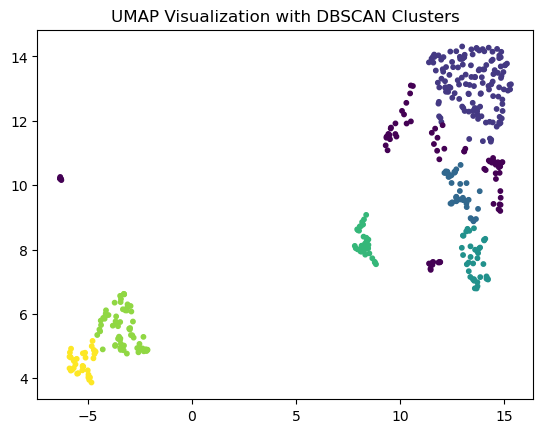%0A)

In \[26\]:

    print("Cluster Information:")
    for cluster, count in cluster_info.items():
        print(f"Cluster {cluster}: {count} data points")

    print(f"Silhouette Score: {silhouette_avg:.2f}")

    Cluster Information:
    Cluster -1: 77 data points
    Cluster 0: 139 data points
    Cluster 1: 36 data points
    Cluster 2: 37 data points
    Cluster 3: 32 data points
    Cluster 4: 62 data points
    Cluster 5: 35 data points
    Silhouette Score: 0.38

In \[27\]:

    Total_score = len(cluster_counts) -1 + 10*(silhouette_avg)
    Total_score

Out\[27\]:

    9.815720081329346